<a href="https://colab.research.google.com/github/Gokulrengaraj0704/Early_Disease_Detection/blob/main/Early_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Early Disease Detection: A Symptom-Based Predictive Model for Heart, Liver, Kidney and Diabetes**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, f_classif
import gradio as gr
import joblib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Heart Disease Prediction

In [ ]:
# Import the Pandas library and read a CSV file into a dataframe
import pandas as pd
CHD = pd.read_csv("/content/drive/MyDrive/Multi-disease Early prediction/Dataset/CHDdata.csv")


In [ ]:
# Accessing the CHD dataframe to perform further operations
CHD


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [ ]:
CHD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


In [ ]:
CHD.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [ ]:
CHD['chd'].value_counts()

0    302
1    160
Name: chd, dtype: int64

In [ ]:
CHD.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [ ]:
CHD.duplicated().sum()

0

<ipython-input-13-c841be5361e2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(CHD.corr(), annot=True)


<Axes: >

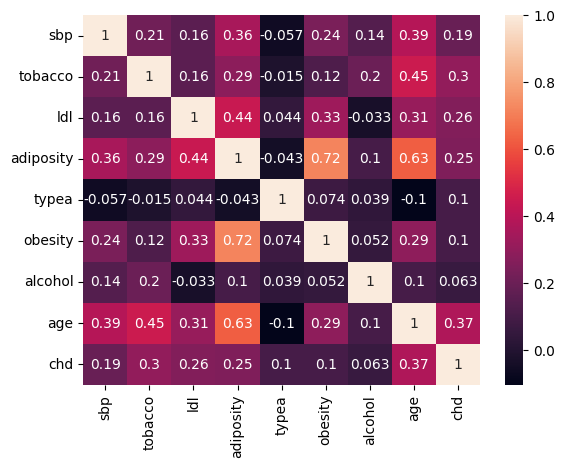

In [ ]:
sns.heatmap(CHD.corr(), annot=True)

array([[<Axes: title={'center': 'sbp'}>,
        <Axes: title={'center': 'tobacco'}>,
        <Axes: title={'center': 'ldl'}>],
       [<Axes: title={'center': 'adiposity'}>,
        <Axes: title={'center': 'typea'}>,
        <Axes: title={'center': 'obesity'}>],
       [<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'age'}>, <Axes: title={'center': 'chd'}>]],
      dtype=object)

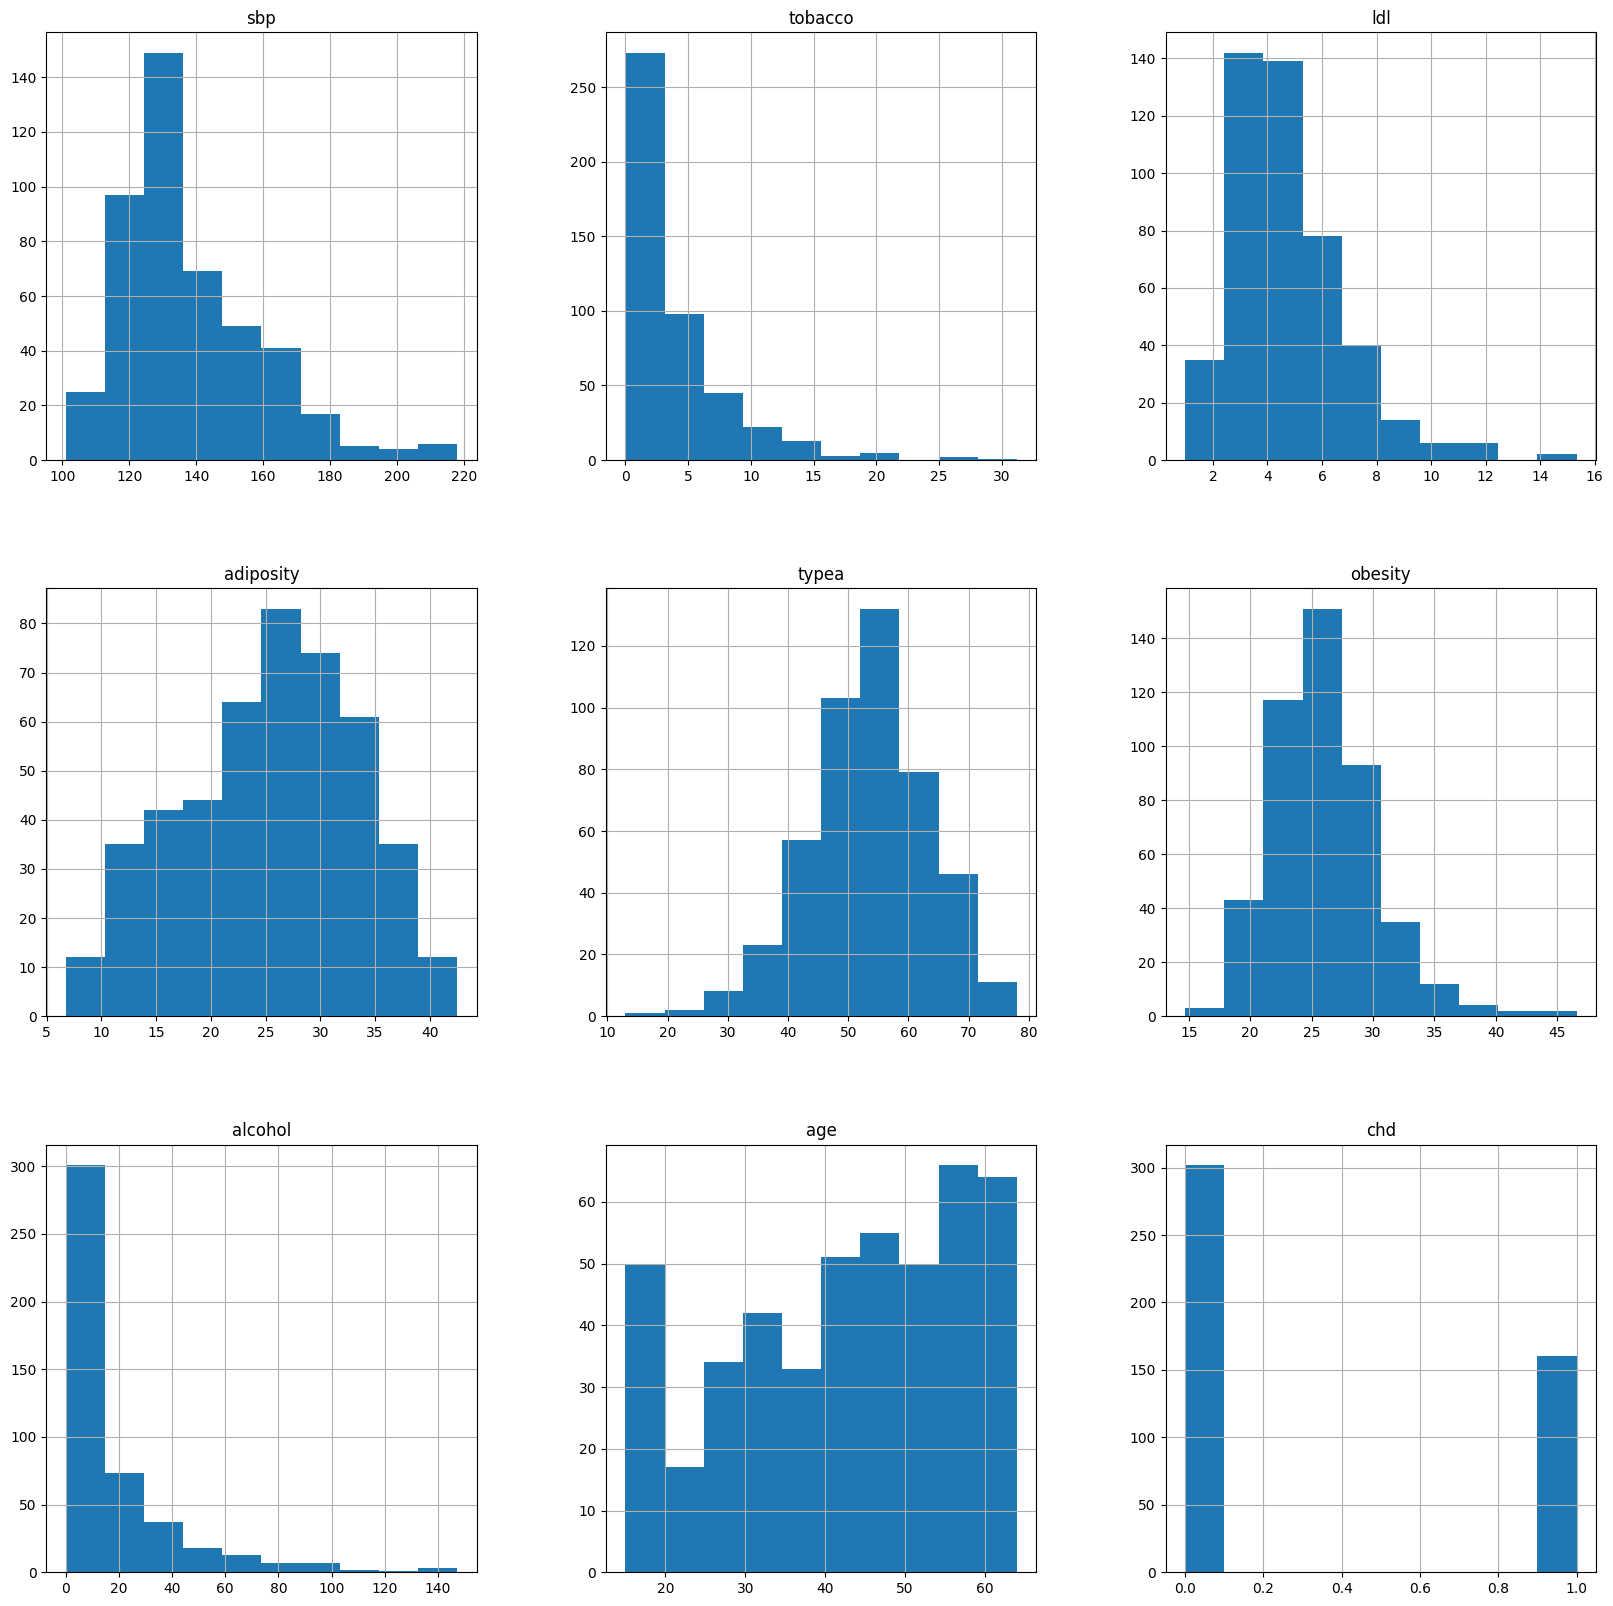

In [ ]:
CHD.hist(figsize=(20,20))

we have selected all the numerical columns

In [ ]:
numeric_cols = CHD.select_dtypes(include=['float64', 'int64']).columns.tolist()


Handling outliers

In [ ]:
for column in CHD[numeric_cols]:
    if column != 'chd':
        q1 = CHD[column].quantile(0.25)
        q3 = CHD[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = CHD[(CHD[column] < lower_bound) | (CHD[column] > upper_bound)].index
        CHD.drop(outliers, inplace=True)

In [ ]:
CHD['bmi'] = CHD['obesity'] / ((CHD['adiposity'] / 100) ** 2)
CHD['bmi']= CHD['bmi']/10
CHD = CHD.drop(['adiposity', 'obesity'], axis=1)

In [ ]:
CHD.head()

,sbp,tobacco,ldl,famhist,typea,alcohol,age,chd,bmi
1,144,0.01,4.41,Absent,55,2.06,63,1,35.270455
2,118,0.08,3.48,Present,52,3.81,46,0,27.965494
3,170,7.50,6.41,Present,51,24.26,58,1,22.118801
5,132,6.20,6.47,Present,62,14.14,45,0,23.467696
6,142,4.05,3.38,Absent,59,2.62,38,0,79.294315


Selecting Best Parameters

In [ ]:

from sklearn.feature_selection import SelectKBest, f_classif
target = CHD['chd']
features = CHD.drop(['chd','famhist'], axis=1)

# select k best features using ANOVA F-test
selector = SelectKBest(f_classif, k=5)
selector.fit(features, target)
selected_features = features.columns[selector.get_support(indices=True)]

print("Selected features:", selected_features)

Selected features: Index(['sbp', 'tobacco', 'ldl', 'age', 'bmi'], dtype='object')


In [ ]:
CHD=CHD.drop(['sbp','alcohol'],axis=1)

In [ ]:
CHD

,tobacco,ldl,famhist,typea,age,chd,bmi
1,0.01,4.41,Absent,55,63,1,35.270455
2,0.08,3.48,Present,52,46,0,27.965494
3,7.50,6.41,Present,51,58,1,22.118801
5,6.20,6.47,Present,62,45,0,23.467696
6,4.05,3.38,Absent,59,38,0,79.294315
...,...,...,...,...,...,...,...
455,2.24,2.83,Absent,48,27,1,34.170462
456,0.40,4.11,Present,56,57,0,18.710675
458,4.20,4.41,Absent,52,52,1,27.765647
459,3.00,1.59,Absent,40,55,0,86.612411


In [ ]:
CHD.to_csv('/content/drive/MyDrive/Multi-disease Early prediction/Pre-processed Dataset/my_CHD.csv', index=False)

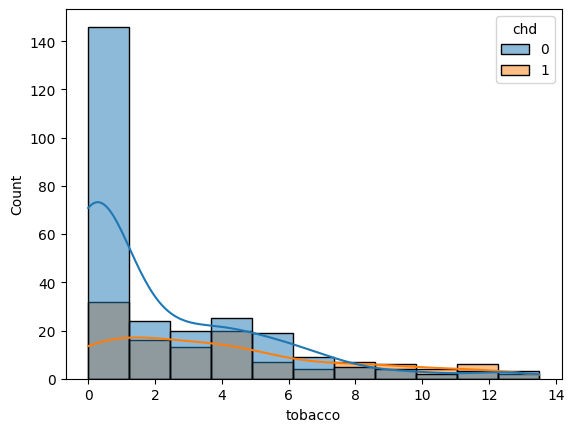

In [ ]:
sns.histplot(CHD, x='tobacco', hue='chd', kde=True)
plt.show()

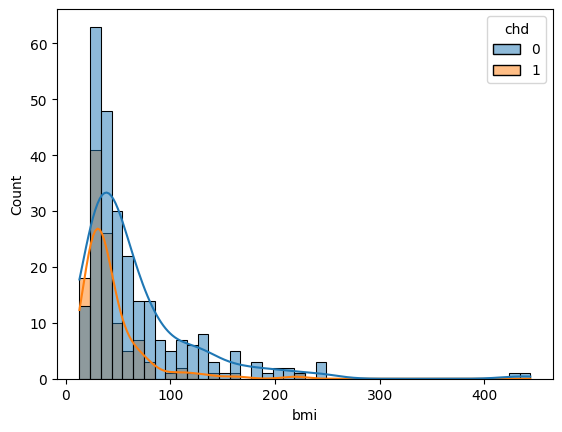

In [ ]:
sns.histplot(CHD, x='bmi', hue='chd', kde=True)
plt.show()

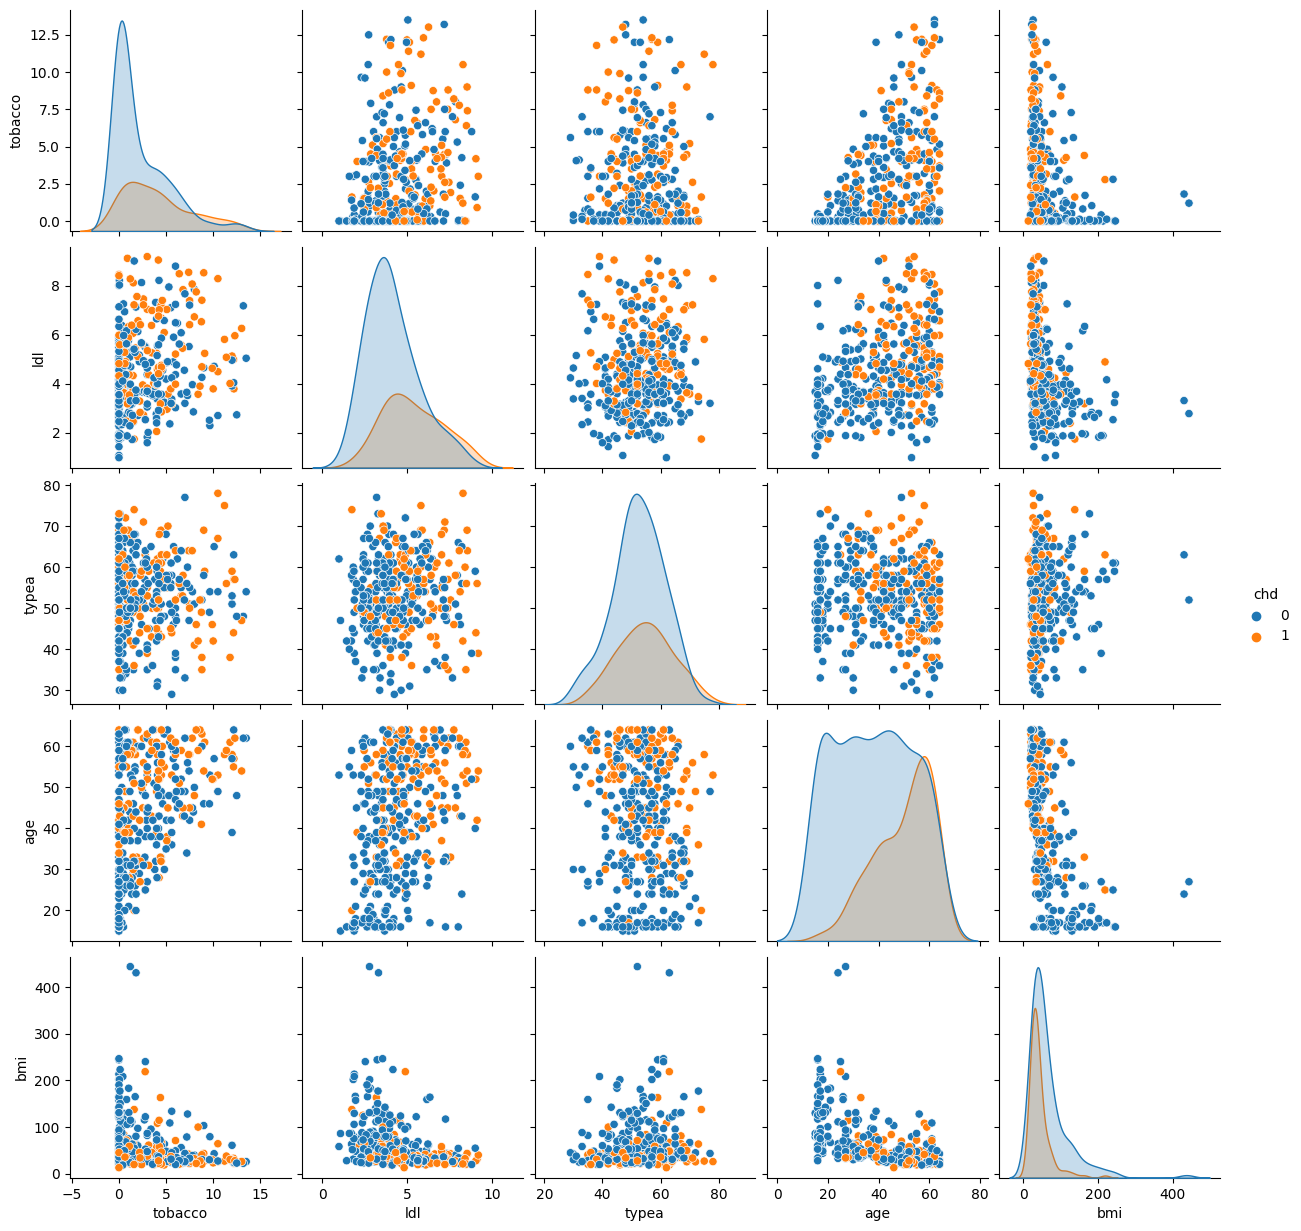

In [ ]:
sns.pairplot(CHD, hue='chd')
plt.show()

In [ ]:
CHD

,tobacco,ldl,famhist,typea,age,chd,bmi
1,0.01,4.41,Absent,55,63,1,35.270455
2,0.08,3.48,Present,52,46,0,27.965494
3,7.50,6.41,Present,51,58,1,22.118801
5,6.20,6.47,Present,62,45,0,23.467696
6,4.05,3.38,Absent,59,38,0,79.294315
...,...,...,...,...,...,...,...
455,2.24,2.83,Absent,48,27,1,34.170462
456,0.40,4.11,Present,56,57,0,18.710675
458,4.20,4.41,Absent,52,52,1,27.765647
459,3.00,1.59,Absent,40,55,0,86.612411


Converting string values to numericals using Label Encoding

In [ ]:

le1 = LabelEncoder()
CHD['famhist'] = le1.fit_transform(CHD['famhist'])

In [ ]:
target = CHD['chd']
features = CHD.drop(['chd'], axis=1)


In [ ]:
target.value_counts()

0    260
1    117
Name: chd, dtype: int64

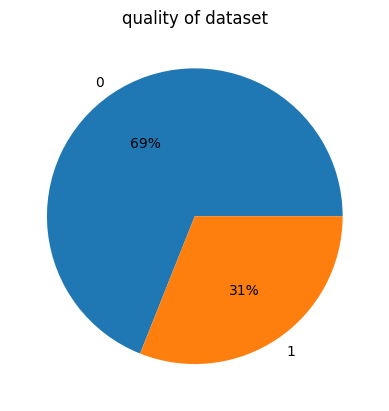

In [ ]:
target_var=pd.crosstab(index=target,columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index,autopct='%.0f%%')
plt.title('quality of dataset')
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler()

x_res, y_res = over_sampler.fit_resample(features, target)

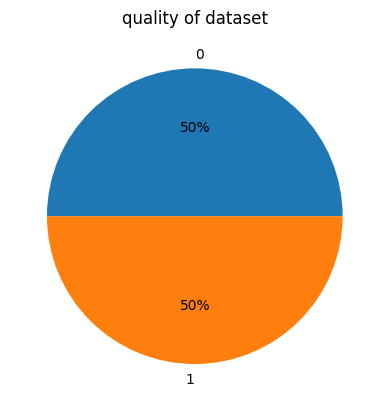

In [ ]:
target_var=pd.crosstab(index=y_res,columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index,autopct='%.0f%%')
plt.title('quality of dataset')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=0)


In [ ]:
clf1 = LogisticRegression(max_iter=100000)
clf2 = DecisionTreeClassifier()
clf3 = GaussianNB()
clf4 = RandomForestClassifier()
clf5 = KNeighborsClassifier()
clf6 = XGBClassifier()
clf7 = AdaBoostClassifier(random_state=100)
clf8 = SVC()
clf9 = MLPClassifier(max_iter=100000)
clf10 = GradientBoostingClassifier()

In [ ]:
from sklearn import model_selection

Accuracy Assessment for 10 Classifiers Using Cross-Validation

In [ ]:
for clf, label in zip([clf1, clf2, clf3,clf4,clf5,clf6,clf7,clf8,clf9,clf10], ['Logistic Regression', 'Decision Tree', 'naive Bayes','Random Forest Classifier','KNN','XGBoost','ADABoost','SVM','MLP','GradientBoosting']):

    scores =  model_selection.cross_val_score(clf,x_res,y_res, cv=15, scoring='accuracy')
    print("Accuracy: %0.5f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.74078 (+/- 0.09) [Logistic Regression]
Accuracy: 0.85434 (+/- 0.06) [Decision Tree]
Accuracy: 0.69826 (+/- 0.09) [naive Bayes]
Accuracy: 0.85221 (+/- 0.07) [Random Forest Classifier]
Accuracy: 0.68101 (+/- 0.10) [KNN]
Accuracy: 0.84863 (+/- 0.08) [XGBoost]
Accuracy: 0.74062 (+/- 0.09) [ADABoost]
Accuracy: 0.68275 (+/- 0.08) [SVM]
Accuracy: 0.67877 (+/- 0.08) [MLP]
Accuracy: 0.81160 (+/- 0.09) [GradientBoosting]


In [ ]:
rf = RandomForestClassifier(random_state=42)

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15], 'min_samples_leaf': [1, 2, 5]}
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

rf = RandomForestClassifier(random_state=42, **grid_search.best_params_)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Test set accuracy:", accuracy_score(y_test, y_pred))
print("Test set precision:", precision_score(y_test, y_pred))
print("Test set recall:", recall_score(y_test, y_pred))
print("Test set F1-score:", f1_score(y_test, y_pred))


Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 200}
Best cross-validation score: 0.838966318234611
Test set accuracy: 0.75
Test set precision: 0.7222222222222222
Test set recall: 0.78
Test set F1-score: 0.7500000000000001


In [ ]:
import joblib
joblib.dump(rf, '/content/drive/MyDrive/Multi-disease Early prediction/models/RandomForest_model.pkl')

['/content/drive/MyDrive/Multi-disease Early prediction/models/RandomForest_model.pkl']

# Diabetes

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Multi-disease Early prediction/Dataset/diabetes.csv")

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0.5, 1.0, 'correlation of feature')

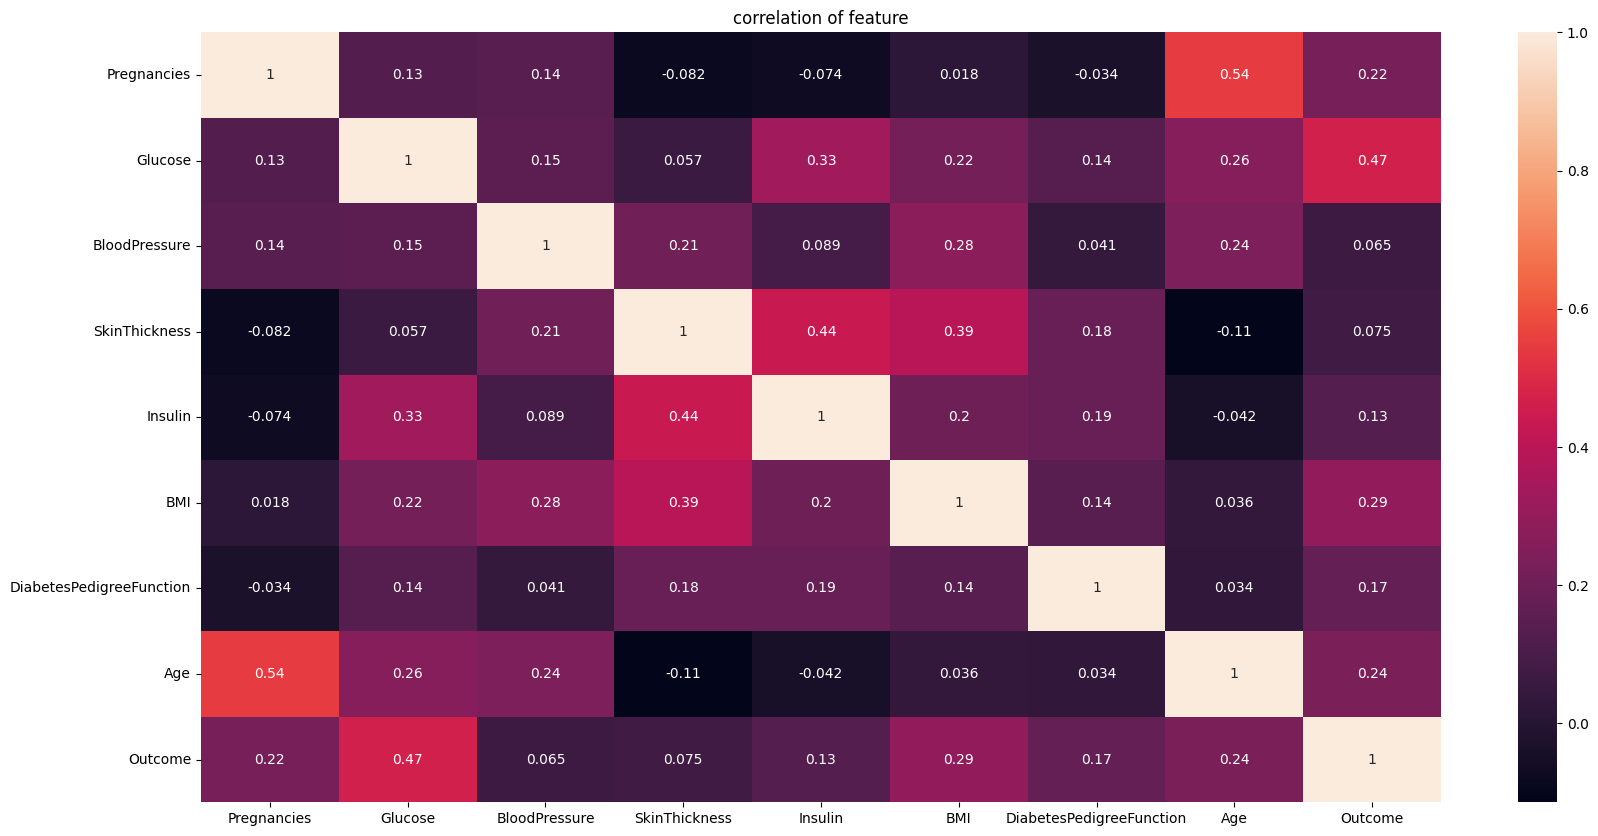

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True)
plt.title("correlation of feature")

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

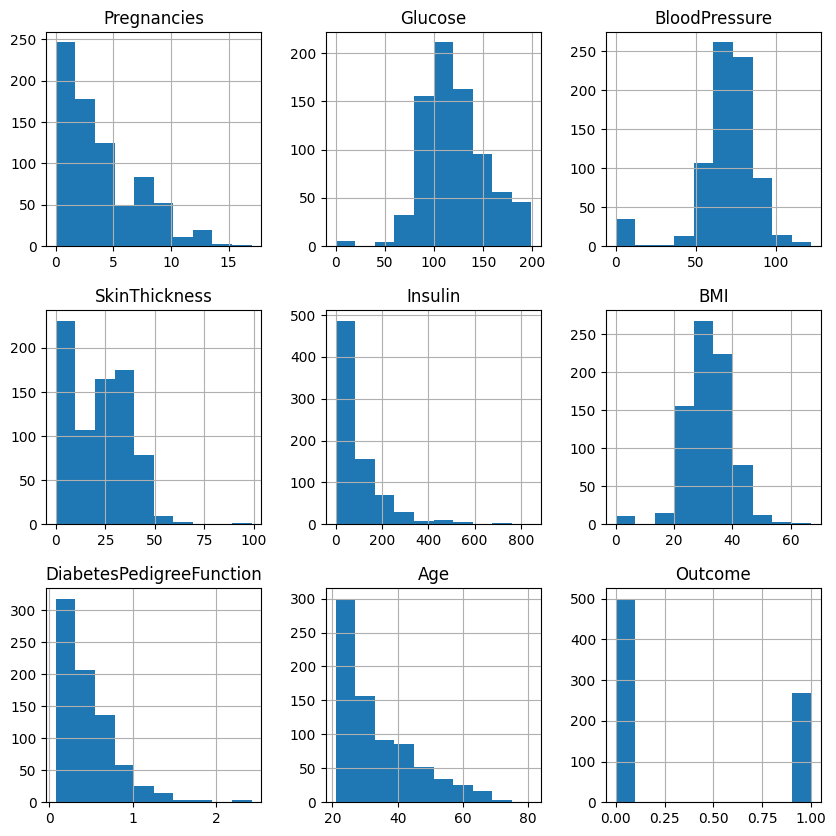

In [ ]:
df.hist(figsize=(10,10))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df=df.drop(['Pregnancies'],axis=1)

In [ ]:
target = df['Outcome']
features = df.drop(['Outcome'], axis=1)

# select k best features using ANOVA F-test
selector = SelectKBest(f_classif, k=5)
selector.fit(features, target)
selected_features = features.columns[selector.get_support(indices=True)]

print("Selected features:", selected_features)

Selected features: Index(['Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


In [ ]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.to_csv('/content/drive/MyDrive/Multi-disease Early prediction/Pre-processed Dataset/my_Diabetes.csv', index=False)

In [ ]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [ ]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

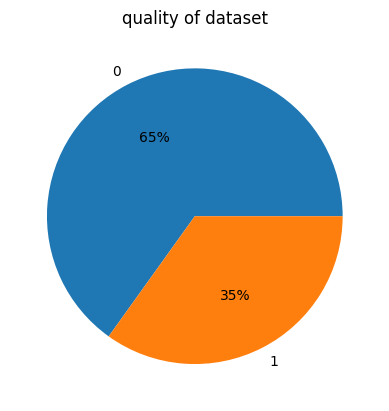

In [ ]:
target_var=pd.crosstab(index=y,columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index,autopct='%.0f%%')
plt.title('quality of dataset')
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler()

x_res, y_res = over_sampler.fit_resample(X,y)

In [ ]:
y_res.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

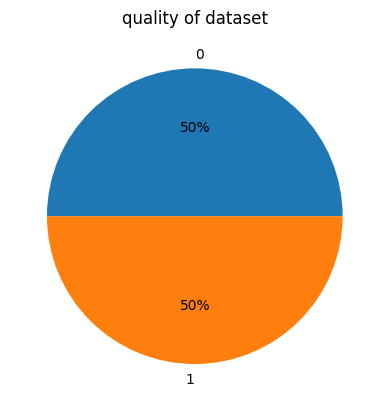

In [ ]:
target_var=pd.crosstab(index=y_res,columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index,autopct='%.0f%%')
plt.title('quality of dataset')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=0)


In [ ]:
clf1 = LogisticRegression(max_iter=100000)
clf2 = DecisionTreeClassifier()
clf3 = GaussianNB()
clf4 = RandomForestClassifier()
clf5 = KNeighborsClassifier()
clf6 = XGBClassifier()
clf7 = AdaBoostClassifier(random_state=100)
clf8 = SVC()
clf9 = MLPClassifier(max_iter=100000)
clf10 = GradientBoostingClassifier()

Accuracy Assessment for 10 Classifiers Using Cross-Validation

In [ ]:
for clf, label in zip([clf1, clf2, clf3,clf4,clf5,clf6,clf7,clf8,clf9,clf10], ['Logistic Regression', 'Decision Tree', 'naive Bayes','Random Forest Classifier','KNN','XGBoost','ADABoost','SVM','MLP','GradientBoosting']):

    scores =  model_selection.cross_val_score(clf,x_res,y_res, cv=15, scoring='accuracy')
    print("Accuracy: %0.5f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.73804 (+/- 0.05) [Logistic Regression]
Accuracy: 0.84327 (+/- 0.07) [Decision Tree]
Accuracy: 0.72702 (+/- 0.04) [naive Bayes]
Accuracy: 0.86629 (+/- 0.07) [Random Forest Classifier]
Accuracy: 0.70793 (+/- 0.05) [KNN]
Accuracy: 0.86223 (+/- 0.06) [XGBoost]
Accuracy: 0.77711 (+/- 0.06) [ADABoost]
Accuracy: 0.72106 (+/- 0.05) [SVM]
Accuracy: 0.67200 (+/- 0.06) [MLP]
Accuracy: 0.81416 (+/- 0.05) [GradientBoosting]


In [ ]:
rf1 = RandomForestClassifier(random_state=42)

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15], 'min_samples_leaf': [1, 2, 5]}
grid_search = GridSearchCV(rf1, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

rf1 = RandomForestClassifier(random_state=42, **grid_search.best_params_)
rf1.fit(X_train, y_train)

y_pred = rf1.predict(X_test)

print("Test set accuracy:", accuracy_score(y_test, y_pred))
print("Test set precision:", precision_score(y_test, y_pred))
print("Test set recall:", recall_score(y_test, y_pred))
print("Test set F1-score:", f1_score(y_test, y_pred))


Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 200}
Best cross-validation score: 0.8425
Test set accuracy: 0.865
Test set precision: 0.788135593220339
Test set recall: 0.9789473684210527
Test set F1-score: 0.8732394366197183


In [ ]:
import joblib
joblib.dump(rf1, '/content/drive/MyDrive/Multi-disease Early prediction/models/RandomForest_model_Diabetes.pkl')

['/content/drive/MyDrive/Multi-disease Early prediction/models/RandomForest_model_Diabetes.pkl']

#Liver Disease

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Multi-disease Early prediction/Dataset/indian_liver_patient.csv")

In [ ]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
data.shape

(583, 11)

In [ ]:
data.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [ ]:
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


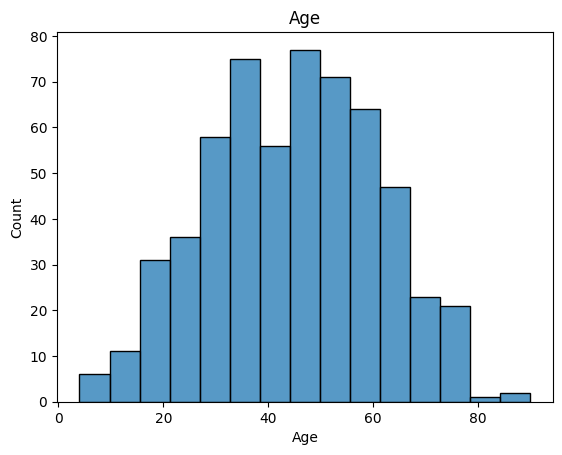

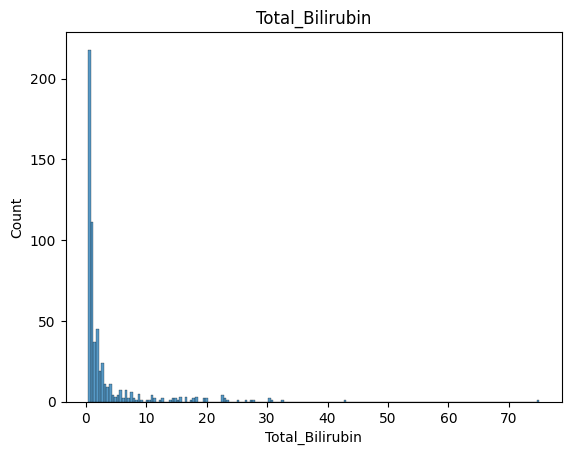

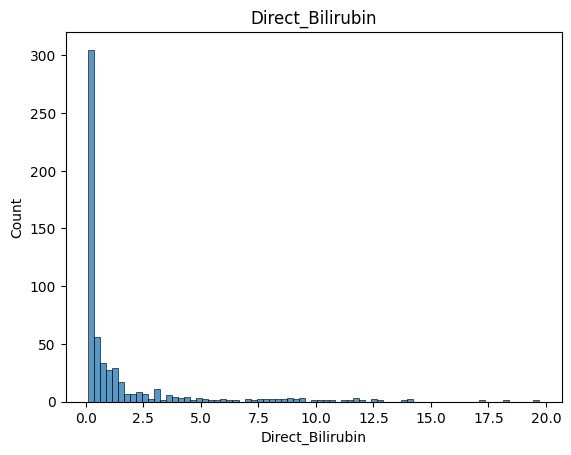

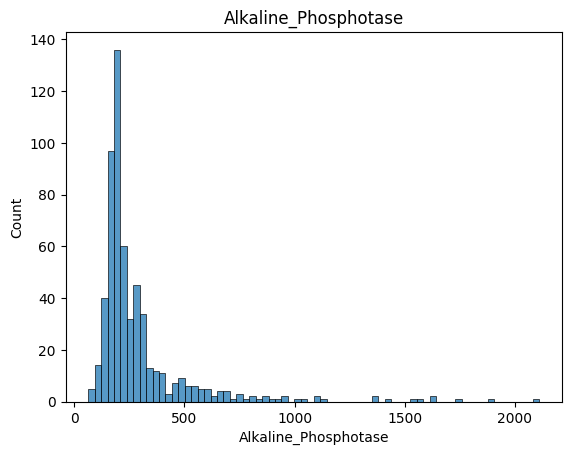

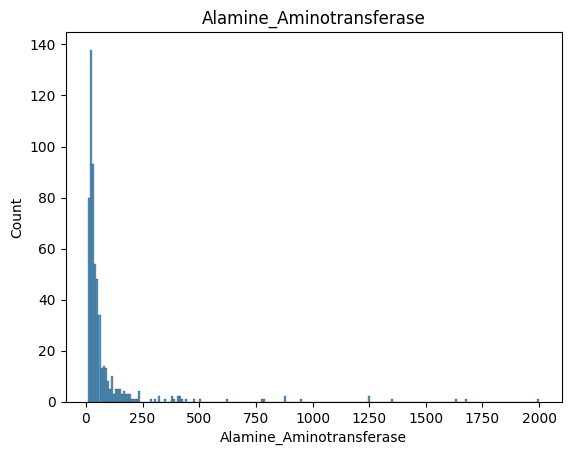

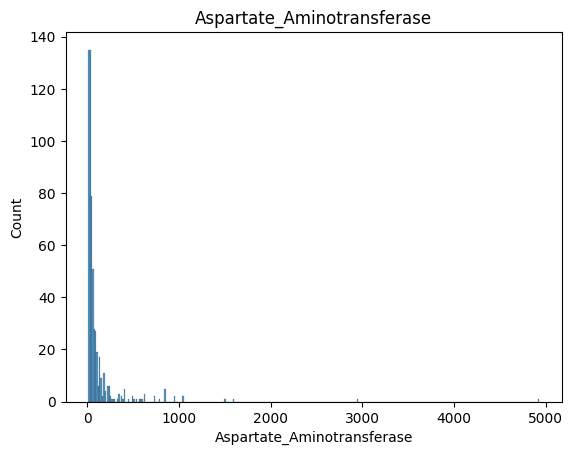

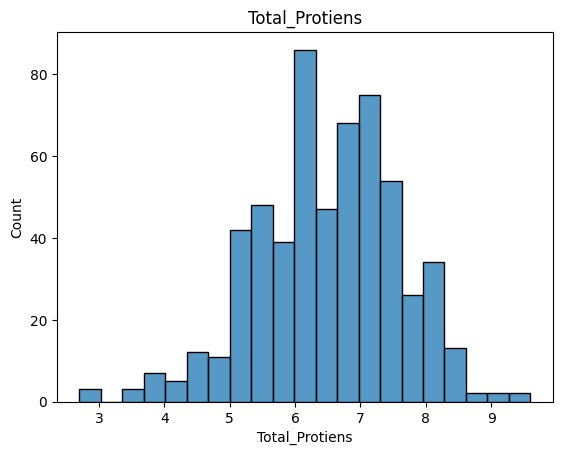

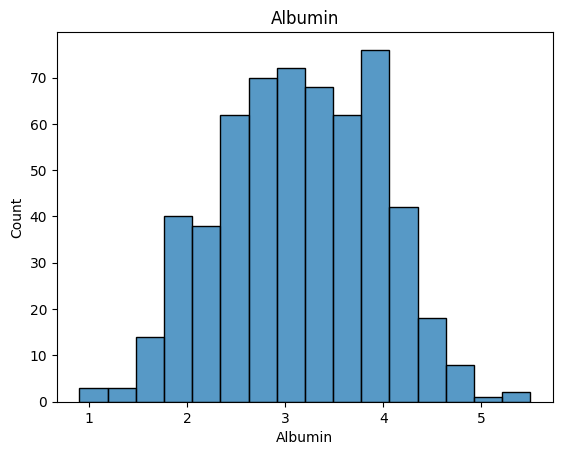

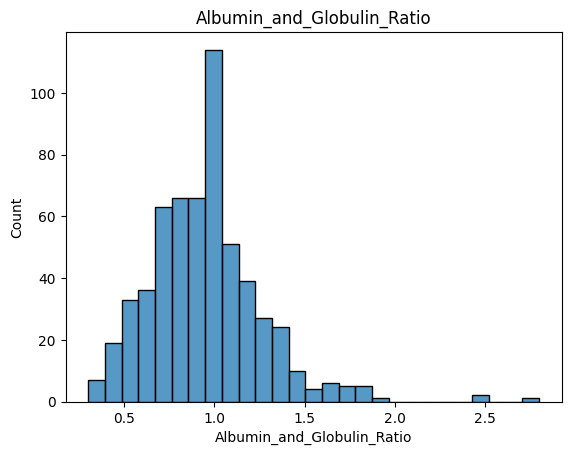

In [ ]:
num_features = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']
for feature in num_features:
    sns.histplot(data[feature], kde=False)
    plt.title(feature)
    plt.show()


<ipython-input-74-7f13782ca862>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


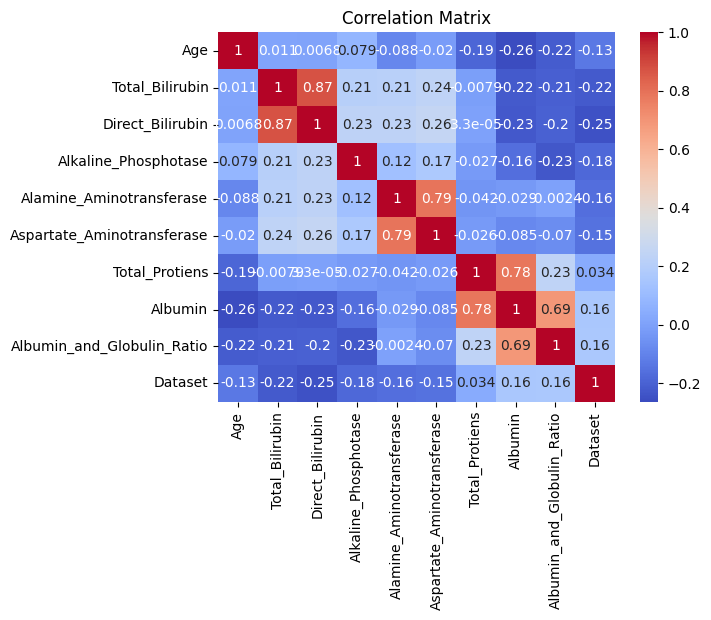

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         579 non-null    int64  
 1   Gender                      579 non-null    object 
 2   Total_Bilirubin             579 non-null    float64
 3   Direct_Bilirubin            579 non-null    float64
 4   Alkaline_Phosphotase        579 non-null    int64  
 5   Alamine_Aminotransferase    579 non-null    int64  
 6   Aspartate_Aminotransferase  579 non-null    int64  
 7   Total_Protiens              579 non-null    float64
 8   Albumin                     579 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     579 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 54.3+ KB


In [ ]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
target = data['Dataset']
features = data.drop(['Dataset','Gender'], axis=1)
selector = SelectKBest(f_classif, k=5)
selector.fit(features, target)
selected_features = features.columns[selector.get_support(indices=True)]

print("Selected features:", selected_features)

Selected features: Index(['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Albumin_and_Globulin_Ratio'],
      dtype='object')


In [ ]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [ ]:
data=data.drop(['Age','Gender','Total_Protiens','Albumin','Aspartate_Aminotransferase'],axis=1)

In [ ]:
data.columns

Index(['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [ ]:
data['Dataset'].value_counts()

1    414
2    165
Name: Dataset, dtype: int64

In [ ]:
data =  data.rename(columns={'Dataset':'Liver_disease'}, inplace=False)

In [ ]:
data['Liver_disease'] = data['Liver_disease'] - 1

In [ ]:
data

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Albumin_and_Globulin_Ratio,Liver_disease
0,0.7,0.1,187,16,0.90,0
1,10.9,5.5,699,64,0.74,0
2,7.3,4.1,490,60,0.89,0
3,1.0,0.4,182,14,1.00,0
4,3.9,2.0,195,27,0.40,0
...,...,...,...,...,...,...
578,0.5,0.1,500,20,0.37,1
579,0.6,0.1,98,35,1.10,0
580,0.8,0.2,245,48,1.00,0
581,1.3,0.5,184,29,1.00,0


In [ ]:
data.to_csv('/content/drive/MyDrive/Multi-disease Early prediction/Pre-processed Dataset/my_Liver.csv', index=False)

In [ ]:
num_features = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase','Albumin_and_Globulin_Ratio']
scaler = StandardScaler()
data[num_features] = scaler.fit_transform(data[num_features])

In [ ]:
X = data.drop(['Liver_disease'], axis=1)
y = data['Liver_disease']

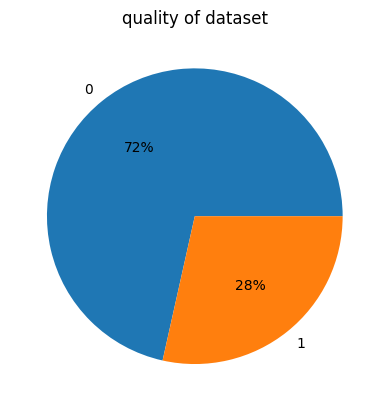

In [ ]:
target_var=pd.crosstab(index=y,columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index,autopct='%.0f%%')
plt.title('quality of dataset')
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler()

x_res, y_res = over_sampler.fit_resample(X,y)

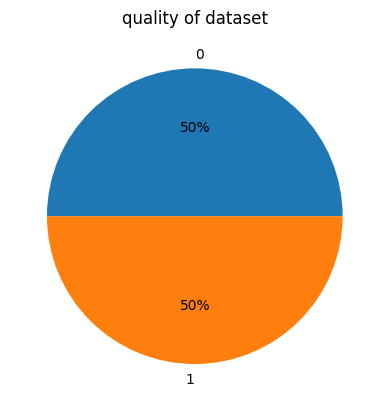

In [ ]:
target_var=pd.crosstab(index=y_res,columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index,autopct='%.0f%%')
plt.title('quality of dataset')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=0)


In [ ]:
clf1 = LogisticRegression(max_iter=100000)
clf2 = DecisionTreeClassifier()
clf3 = GaussianNB()
clf4 = RandomForestClassifier()
clf5 = KNeighborsClassifier()
clf6 = XGBClassifier()
clf7 = AdaBoostClassifier(random_state=100)
clf8 = SVC()
clf9 = MLPClassifier(max_iter=100000)
clf10 = GradientBoostingClassifier()

Accuracy Assessment for 10 Classifiers Using Cross-Validation

In [ ]:
for clf, label in zip([clf1, clf2, clf3,clf4,clf5,clf6,clf7,clf8,clf9,clf10], ['Logistic Regression', 'Decision Tree', 'naive Bayes','Random Forest Classifier','KNN','XGBoost','ADABoost','SVM','MLP','GradientBoosting']):

    scores =  model_selection.cross_val_score(clf,x_res,y_res, cv=15, scoring='accuracy')
    print("Accuracy: %0.5f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.70649 (+/- 0.09) [Logistic Regression]
Accuracy: 0.84061 (+/- 0.08) [Decision Tree]
Accuracy: 0.65455 (+/- 0.08) [naive Bayes]
Accuracy: 0.87091 (+/- 0.05) [Random Forest Classifier]
Accuracy: 0.72461 (+/- 0.08) [KNN]
Accuracy: 0.84916 (+/- 0.07) [XGBoost]
Accuracy: 0.74162 (+/- 0.07) [ADABoost]
Accuracy: 0.70530 (+/- 0.09) [SVM]
Accuracy: 0.70535 (+/- 0.08) [MLP]
Accuracy: 0.78262 (+/- 0.07) [GradientBoosting]


In [ ]:
rf2 = RandomForestClassifier(random_state=42)

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15], 'min_samples_leaf': [1, 2, 5]}
grid_search = GridSearchCV(rf2, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

rf2 = RandomForestClassifier(random_state=42, **grid_search.best_params_)
rf2.fit(X_train, y_train)

y_pred = rf2.predict(X_test)

print("Test set accuracy:", accuracy_score(y_test, y_pred))
print("Test set precision:", precision_score(y_test, y_pred))
print("Test set recall:", recall_score(y_test, y_pred))
print("Test set F1-score:", f1_score(y_test, y_pred))


Best parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 200}
Best cross-validation score: 0.8246494798733603
Test set accuracy: 0.8012048192771084
Test set precision: 0.7653061224489796
Test set recall: 0.8823529411764706
Test set F1-score: 0.8196721311475409


In [ ]:
import joblib
joblib.dump(rf2, '/content/drive/MyDrive/Multi-disease Early prediction/models/RandomForest_model_Liver.pkl')

['/content/drive/MyDrive/Multi-disease Early prediction/models/RandomForest_model_Liver.pkl']

In [ ]:
import gradio as gr
import joblib
import pandas as pd

# load the trained models
chd_model = joblib.load('/content/drive/MyDrive/Multi-disease Early prediction/models/RandomForest_model.pkl')
diabetes_model = joblib.load('/content/drive/MyDrive/Multi-disease Early prediction/models/RandomForest_model_Diabetes.pkl')
liver_model = joblib.load('/content/drive/MyDrive/Multi-disease Early prediction/models/RandomForest_model_Liver.pkl')

CHD=pd.read_csv("/content/drive/MyDrive/Multi-disease Early prediction/Pre-processed Dataset/my_CHD.csv")
df=pd.read_csv("/content/drive/MyDrive/Multi-disease Early prediction/Pre-processed Dataset/my_Diabetes.csv")
data=pd.read_csv("/content/drive/MyDrive/Multi-disease Early prediction/Pre-processed Dataset/my_Liver.csv")

# Define the input components
age = gr.inputs.Number(default=50, label='Age')
bmi = gr.inputs.Number(default=25, label='BMI')
tobacco = gr.inputs.Number(default=0, label='Tobacco (kg/day)')
ldl = gr.inputs.Number(default=5, label='LDL Cholesterol (mg/dl)')
typea = gr.inputs.Number(default=50, label='Type A Behavior Score (0-100)')
famhist = gr.inputs.Dropdown(choices=list(CHD['famhist'].unique()), label='Family History of Heart Disease')
glucose = gr.inputs.Number(label='Glucose level', default=100)
blood_pressure = gr.inputs.Number(label='Blood pressure (mm Hg)', default=70)
skin_thickness = gr.inputs.Number(label='Skin Thickness (mm)', default=20)
insulin = gr.inputs.Number(label='Insulin level (mu U/ml)', default=0)
diabetes_pedigree_function = gr.inputs.Number(label='Diabetes Pedigree Function', default=0.5)
total_bilirubin = gr.inputs.Number(default=1.1, label='Total Bilirubin')
direct_bilirubin = gr.inputs.Number(default=0.3, label='Direct Bilirubin')
alkaline_phosphotase = gr.inputs.Number(default=187, label='Alkaline Phosphotase')
alamine_aminotransferase = gr.inputs.Number(default=23, label='Alamine Aminotransferase')
albumin_and_globulin_ratio = gr.inputs.Number(default=0.9, label='Albumin and Globulin Ratio')



# Define the output component
output = [gr.outputs.Label(label='Heart Disease Prediction'),gr.outputs.Label(label='Diabetes Disease Prediction'),gr.outputs.Label(label='Liver Disease Prediction')]
label='Heart Disease Prediction'
# Define the predict function
def predict_heart_disease(age, bmi, tobacco, ldl, famhist, typea, glucose, blood_pressure, skin_thickness, insulin, diabetes_pedigree_function,total_bilirubin, direct_bilirubin, alkaline_phosphotase, alamine_aminotransferase, albumin_and_globulin_ratio):
    from sklearn.preprocessing import LabelEncoder
    le1 = LabelEncoder()
    CHD=pd.read_csv("/content/drive/MyDrive/Multi-disease Early prediction/Pre-processed Dataset/my_CHD.csv")
    CHD['famhist'] = le1.fit_transform(CHD['famhist'])
    famhist = le1.transform([famhist])[0]
    data = {
            'tobacco': tobacco,
            'ldl': ldl,
            'famhist': famhist,
            'typea': typea,
            'age': age,
            'bmi': bmi}
    df = pd.DataFrame(data, index=[0])
    prediction = chd_model.predict(df)[0]
    if prediction == 0:
      Heart_Disease='Low Risk of Heart Disease'
    else:
      Heart_Disease='High Risk of Heart Disease'

    custom_input = pd.DataFrame({
        'Glucose': [glucose],
        'BloodPressure': [blood_pressure],
        'SkinThickness': [skin_thickness],
        'Insulin': [insulin],
        'BMI': [bmi],
        'DiabetesPedigreeFunction': [diabetes_pedigree_function],
        'Age': [age]
    })
    predicted_outcome = diabetes_model.predict(custom_input)[0]
    if predicted_outcome == 0:
      Diabetes_Disease='Low Risk of Diabetes Disease'
    else:
      Diabetes_Disease='High Risk of Diabetes Disease'
    data = pd.DataFrame({
        'Total_Bilirubin': [total_bilirubin],
        'Direct_Bilirubin': [direct_bilirubin],
        'Alkaline_Phosphotase': [alkaline_phosphotase],
        'Alamine_Aminotransferase': [alamine_aminotransferase],
        'Albumin_and_Globulin_Ratio': [albumin_and_globulin_ratio]
    })

    scaler = StandardScaler()
    data = scaler.fit_transform(data)

    predicted_disease = liver_model.predict(data)[0]
    if predicted_disease == 0:
        Liver_Disease = "Low Risk of Liver disease"
    else:
        Liver_Disease = "High Risk of Liver disease"
    return Heart_Disease,Diabetes_Disease,Liver_Disease

# Define the Gradio interface
interface = gr.Interface(predict_heart_disease,
                         inputs=[age, bmi, tobacco, ldl, famhist, typea, glucose, blood_pressure, skin_thickness, insulin, diabetes_pedigree_function,total_bilirubin, direct_bilirubin, alkaline_phosphotase, alamine_aminotransferase, albumin_and_globulin_ratio],
                         outputs=output,
                         title='Multi-Disease Prediction',
                         description='Predict the risk of heart disease, diabetes, and liver disease based on patient information')

# Launch the interface
interface.launch(debug=True, share=True)



/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:62: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(value=default, label=label, optional=optional)
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:219: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:222: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.componen

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://46c500ffc104b4642a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
